# sources

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/


https://www.google.com/search?q=can+grid+search+cv+improve+model+performance+for+neural+networks&sca_esv=ae093cb415ffb20d&sxsrf=ADLYWIKR8ewhlzB_Ov-mUzHRLwAqjlbgXg%3A1731445911570&ei=l8QzZ_vEIv_k0PEPpIn9oAo&oq=can+grid+search+cv+improve+model+performance+for+&gs_lp=Egxnd3Mtd2l6LXNlcnAiMWNhbiBncmlkIHNlYXJjaCBjdiBpbXByb3ZlIG1vZGVsIHBlcmZvcm1hbmNlIGZvciAqAggAMgUQIRigATIFECEYoAEyBRAhGKABMgUQIRigATIFECEYqwIyBRAhGKsCMgUQIRirAkjKgQFQyQpYwXRwAXgBkAEAmAGpAaABtSmqAQQyLjM2uAEByAEA-AEBmAInoALyKcICChAAGLADGNYEGEfCAgQQIxgnwgIKECMYgAQYJxiKBcICCxAAGIAEGJECGIoFwgINEAAYgAQYsQMYQxiKBcICERAuGIAEGLEDGNEDGIMBGMcBwgILEAAYgAQYsQMYgwHCAgoQABiABBhDGIoFwgIQEC4YgAQY0QMYQxjHARiKBcICCBAuGIAEGLEDwgIOEC4YgAQYsQMY0QMYxwHCAggQABiABBixA8ICCxAuGIAEGLEDGIMBwgIREAAYgAQYsQMYgwEYxwMYigXCAgUQABiABMICDhAAGIAEGLEDGIMBGIoFwgIGEAAYFhgewgIIEAAYFhgKGB7CAgsQABiABBiGAxiKBcICCBAAGIAEGKIEwgIHECEYoAEYCsICBRAhGJ8FwgIHECEYChirAsICCBAAGKIEGIkFmAMAiAYBkAYIkgcEMi4zN6AHvb4C&sclient=gws-wiz-serp 

https://www.tensorflow.org/api_docs/python/tf/keras/layers 


https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

https://medium.com/@abdallahashraf90x/all-you-need-to-know-about-correlation-for-machine-learning-e249fec292e9#:~:text=It%20is%20not%20enough%20to,little%20connection%20between%20the%20variables.

In [138]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importing libraries for model use for NN:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import roc_auc_score, recall_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

# Load all data

In [2]:
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
bureau = pd.read_csv('bureau.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')

In [3]:
df_application_train = pd.read_csv('application_train.csv')
df_application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_application_test = pd.read_csv('application_test.csv')
df_application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
df_application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# df_application_train

In [6]:
df_application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
# Leaving out high correlated values:
corr_matrix = df_application_train.corr().abs() # Getting the correlated values
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Getting the upper traingular matrix
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df_application_train.drop(columns=to_drop, inplace=True) # Dropping the columns that have a high correlated value of 0.9.

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_37716/1005147158.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_application_train.corr().abs() # Getting the correlated values


In [8]:
df_application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 87 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [9]:
# Selected Cols:
selected_features= ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                     'AMT_CREDIT','AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 
                     'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 
                     'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET']

medi_columns = [col for col in df_application_train.columns if '_MEDI' in col] # Selecting the features that end with '_MEDI'

final_features = list(set(selected_features + medi_columns))

df_application_train = df_application_train[final_features] # Dropping both the selected features and medi_columns
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NAME_FAMILY_STATUS   307511 non-null  object 
 1   AMT_INCOME_TOTAL     307511 non-null  float64
 2   ORGANIZATION_TYPE    307511 non-null  object 
 3   SK_ID_CURR           307511 non-null  int64  
 4   AMT_CREDIT           307511 non-null  float64
 5   AMT_ANNUITY          307499 non-null  float64
 6   OCCUPATION_TYPE      211120 non-null  object 
 7   EXT_SOURCE_1         134133 non-null  float64
 8   EXT_SOURCE_2         306851 non-null  float64
 9   TARGET               307511 non-null  int64  
 10  EXT_SOURCE_3         246546 non-null  float64
 11  NAME_HOUSING_TYPE    307511 non-null  object 
 12  DAYS_BIRTH           307511 non-null  int64  
 13  NAME_CONTRACT_TYPE   307511 non-null  object 
 14  NAME_INCOME_TYPE     307511 non-null  object 
 15  NAME_EDUCATION_TY

In [10]:
# Dropping duplicates
df_application_train.drop_duplicates(inplace=True)
df_application_train.dropna(subset=['TARGET'], inplace=True)  # Ensure no missing targets


/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_37716/1492690994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_train.drop_duplicates(inplace=True)
/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_37716/1492690994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_train.dropna(subset=['TARGET'], inplace=True)  # Ensure no missing targets


In [12]:
df_application_train.isnull().sum()

NAME_FAMILY_STATUS          0
AMT_INCOME_TOTAL            0
ORGANIZATION_TYPE           0
SK_ID_CURR                  0
AMT_CREDIT                  0
AMT_ANNUITY                12
OCCUPATION_TYPE         96391
EXT_SOURCE_1           173378
EXT_SOURCE_2              660
TARGET                      0
EXT_SOURCE_3            60965
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
NAME_CONTRACT_TYPE          0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
DAYS_EMPLOYED               0
dtype: int64

In [13]:
df_application_train.duplicated().sum()

0

In [14]:
from preprocessed_DataClass import handle_missing_values
df_application_train = handle_missing_values(df_application_train)

/Users/yanellyhernandez/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Learning Fuze/mod2/week 9/Data_class_proj/preprocessed_DataClass.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])
/Users/yanellyhernandez/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Learning Fuze/mod2/week 9/Data_class_proj/preprocessed_DataClass.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])
/Users/yanellyhe

In [15]:
df_application_train.isnull().sum().sum()

0

In [16]:
df_application_train.isnull().sum()

NAME_FAMILY_STATUS     0
AMT_INCOME_TOTAL       0
ORGANIZATION_TYPE      0
SK_ID_CURR             0
AMT_CREDIT             0
AMT_ANNUITY            0
OCCUPATION_TYPE        0
EXT_SOURCE_2           0
TARGET                 0
EXT_SOURCE_3           0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
NAME_CONTRACT_TYPE     0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
DAYS_EMPLOYED          0
dtype: int64

In [17]:
# reducing the size of df_application_train 
from preprocessed_DataClass import red_mem_usage
df_application_train, _ = red_mem_usage(df_application_train)

Memory usage of this df is:  39.88408660888672 MB
--------------------------------
column:  AMT_INCOME_TOTAL
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  SK_ID_CURR
data type before:  int64
data type after:  uint32
--------------------------------
--------------------------------
column:  AMT_CREDIT
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  AMT_ANNUITY
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  EXT_SOURCE_2
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  TARGET
data type before:  int64
data type after:  uint8
--------------------------------
--------------------------------
column:  EXT_SOURCE_3
data type before:  float64
data type after:  float32
----------

In [18]:
df_application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NAME_FAMILY_STATUS   307511 non-null  object 
 1   AMT_INCOME_TOTAL     307511 non-null  float32
 2   ORGANIZATION_TYPE    307511 non-null  object 
 3   SK_ID_CURR           307511 non-null  uint32 
 4   AMT_CREDIT           307511 non-null  float32
 5   AMT_ANNUITY          307511 non-null  float32
 6   OCCUPATION_TYPE      307511 non-null  object 
 7   EXT_SOURCE_2         307511 non-null  float32
 8   TARGET               307511 non-null  uint8  
 9   EXT_SOURCE_3         307511 non-null  float32
 10  NAME_HOUSING_TYPE    307511 non-null  object 
 11  DAYS_BIRTH           307511 non-null  int16  
 12  NAME_CONTRACT_TYPE   307511 non-null  object 
 13  NAME_INCOME_TYPE     307511 non-null  object 
 14  NAME_EDUCATION_TYPE  307511 non-null  object 
 15  DAYS_EMPLOYED    

# POS_CASH_balance

In [19]:
# POS_CASH_balance
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [20]:
# Selecting features:
POS_CASH_balance = POS_CASH_balance[['SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD_DEF', 'NAME_CONTRACT_STATUS']]
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_CURR             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   SK_DPD_DEF             int64  
 5   NAME_CONTRACT_STATUS   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 457.8+ MB


In [21]:
POS_CASH_balance.isnull().sum() # 0 months bal

SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
SK_DPD_DEF                   0
NAME_CONTRACT_STATUS         0
dtype: int64

In [22]:
# checking for any duplicates:
POS_CASH_balance.duplicated().sum()

29479

In [23]:
# dropping the dupilcates:
POS_CASH_balance.drop_duplicates(inplace=True)
POS_CASH_balance.duplicated().sum()

0

In [24]:
from preprocessed_DataClass import handle_missing_values
POS_CASH_balance = handle_missing_values(POS_CASH_balance)
POS_CASH_balance.isnull().sum().sum()

0

In [25]:
# Feature engineering
POS_CASH_balance['INSTALMENT_RATIO'] = POS_CASH_balance['CNT_INSTALMENT'] / (POS_CASH_balance['CNT_INSTALMENT_FUTURE'] + 1e-5)

In [26]:
# reducing the size of POS_CASH_balance
from preprocessed_DataClass import red_mem_usage
POS_CASH_balance, _ = red_mem_usage(POS_CASH_balance)

Memory usage of this df is:  608.6351928710938 MB
--------------------------------
column:  SK_ID_CURR
data type before:  int64
data type after:  uint32
--------------------------------
--------------------------------
column:  MONTHS_BALANCE
data type before:  int64
data type after:  int8
--------------------------------
--------------------------------
column:  CNT_INSTALMENT
data type before:  float64
data type after:  uint8
--------------------------------
--------------------------------
column:  CNT_INSTALMENT_FUTURE
data type before:  float64
data type after:  uint8
--------------------------------
--------------------------------
column:  SK_DPD_DEF
data type before:  int64
data type after:  uint16
--------------------------------
--------------------------------
column:  INSTALMENT_RATIO
data type before:  float64
data type after:  float32
--------------------------------
___ memory usage after: __
Memory usage is: 275.78782176971436 MB


In [27]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971879 entries, 0 to 10001357
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_CURR             uint32 
 1   MONTHS_BALANCE         int8   
 2   CNT_INSTALMENT         uint8  
 3   CNT_INSTALMENT_FUTURE  uint8  
 4   SK_DPD_DEF             uint16 
 5   NAME_CONTRACT_STATUS   object 
 6   INSTALMENT_RATIO       float32
dtypes: float32(1), int8(1), object(1), uint16(1), uint32(1), uint8(2)
memory usage: 275.8+ MB


In [28]:
# Aggregated features that were selected
POS_CASH_agg = POS_CASH_balance.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['mean', 'min', 'max'],  
    'CNT_INSTALMENT': ['mean', 'min', 'max'],  
    'CNT_INSTALMENT_FUTURE': ['mean', 'min', 'max'], 
    'SK_DPD_DEF': ['mean','max'],
    'NAME_CONTRACT_STATUS' : ['count'],
    'INSTALMENT_RATIO': ['mean', 'max'] 
}).reset_index()

# Flatten column names
POS_CASH_agg.columns = ['_'.join(col).strip('_') for col in POS_CASH_agg.columns.values]

# Bureau

In [29]:
bureau.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [30]:
# Selected features:
bureau = bureau[['SK_ID_CURR','SK_ID_BUREAU', 'CREDIT_ACTIVE', 
                 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 
                 'AMT_CREDIT_SUM','DAYS_CREDIT_UPDATE', 
                 'CREDIT_DAY_OVERDUE', 'CREDIT_TYPE']]

bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   SK_ID_CURR           int64  
 1   SK_ID_BUREAU         int64  
 2   CREDIT_ACTIVE        object 
 3   DAYS_CREDIT          int64  
 4   DAYS_CREDIT_ENDDATE  float64
 5   AMT_CREDIT_SUM       float64
 6   DAYS_CREDIT_UPDATE   int64  
 7   CREDIT_DAY_OVERDUE   int64  
 8   CREDIT_TYPE          object 
dtypes: float64(2), int64(5), object(2)
memory usage: 117.9+ MB


In [31]:
bureau.isnull().sum()

SK_ID_CURR                  0
SK_ID_BUREAU                0
CREDIT_ACTIVE               0
DAYS_CREDIT                 0
DAYS_CREDIT_ENDDATE    105553
AMT_CREDIT_SUM             13
DAYS_CREDIT_UPDATE          0
CREDIT_DAY_OVERDUE          0
CREDIT_TYPE                 0
dtype: int64

In [32]:
from preprocessed_DataClass import handle_missing_values
bureau = handle_missing_values(bureau)
bureau.isnull().sum()

SK_ID_CURR             0
SK_ID_BUREAU           0
CREDIT_ACTIVE          0
DAYS_CREDIT            0
DAYS_CREDIT_ENDDATE    0
AMT_CREDIT_SUM         0
DAYS_CREDIT_UPDATE     0
CREDIT_DAY_OVERDUE     0
CREDIT_TYPE            0
dtype: int64

In [33]:
# checking for any duplicates:
bureau.duplicated().sum()

0

In [34]:
bureau = bureau.drop_duplicates()
# checking if all duplicates are dropped:
bureau.duplicated().sum()

0

In [35]:
# Feature Engineering:
bureau['DEFAULT_RATE'] = bureau['CREDIT_DAY_OVERDUE'] / (bureau['AMT_CREDIT_SUM'] + 1e-5)

In [36]:
# reducing the size of bureau
from preprocessed_DataClass import red_mem_usage
bureau, _ = red_mem_usage(bureau)

Memory usage of this df is:  144.04837036132812 MB
--------------------------------
column:  SK_ID_CURR
data type before:  int64
data type after:  uint32
--------------------------------
--------------------------------
column:  SK_ID_BUREAU
data type before:  int64
data type after:  uint32
--------------------------------
--------------------------------
column:  DAYS_CREDIT
data type before:  int64
data type after:  int16
--------------------------------
--------------------------------
column:  DAYS_CREDIT_ENDDATE
data type before:  float64
data type after:  int32
--------------------------------
--------------------------------
column:  AMT_CREDIT_SUM
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  DAYS_CREDIT_UPDATE
data type before:  int64
data type after:  int32
--------------------------------
--------------------------------
column:  CREDIT_DAY_OVERDUE
data type before:  int64
data type after:  uin

In [37]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 0 to 1716427
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   SK_ID_CURR           uint32 
 1   SK_ID_BUREAU         uint32 
 2   CREDIT_ACTIVE        object 
 3   DAYS_CREDIT          int16  
 4   DAYS_CREDIT_ENDDATE  int32  
 5   AMT_CREDIT_SUM       float32
 6   DAYS_CREDIT_UPDATE   int32  
 7   CREDIT_DAY_OVERDUE   uint16 
 8   CREDIT_TYPE          object 
 9   DEFAULT_RATE         float32
dtypes: float32(2), int16(1), int32(2), object(2), uint16(1), uint32(2)
memory usage: 85.1+ MB


In [38]:
# Selective aggregation for bureau data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': ['mean', 'min', 'max'],
    'DAYS_CREDIT_ENDDATE': ['mean'],
    'AMT_CREDIT_SUM': ['mean', 'max'],
    'DAYS_CREDIT_UPDATE': ['mean', 'max'],
    'CREDIT_DAY_OVERDUE': ['mean', 'max'],
    'CREDIT_TYPE': ['count'],
    'DEFAULT_RATE': 'mean'
}).reset_index()

# Flatten multi-level column index if it exists (as in this case with multiple aggregations)
bureau_agg.columns = ['_'.join(col).strip('_') for col in bureau_agg.columns.values]

# credit_card_balance

In [39]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [40]:
# Leaving out high correlated values:
corr_matrix = credit_card_balance.corr().abs() # Getting the correlated values
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Getting the upper traingular matrix
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
credit_card_balance.drop(columns=to_drop, inplace=True) # Dropping the columns that have a high correlated value of 0.9.


/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_37716/3965434236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = credit_card_balance.corr().abs() # Getting the correlated values


In [41]:
credit_card_balance = credit_card_balance[['SK_ID_CURR', 'AMT_BALANCE', 'AMT_PAYMENT_CURRENT',
                                           'CNT_DRAWINGS_ATM_CURRENT', 'NAME_CONTRACT_STATUS', 'SK_DPD',
                                           'AMT_INST_MIN_REGULARITY', 'SK_DPD_DEF']] # best auc
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   SK_ID_CURR                int64  
 1   AMT_BALANCE               float64
 2   AMT_PAYMENT_CURRENT       float64
 3   CNT_DRAWINGS_ATM_CURRENT  float64
 4   NAME_CONTRACT_STATUS      object 
 5   SK_DPD                    int64  
 6   AMT_INST_MIN_REGULARITY   float64
 7   SK_DPD_DEF                int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 234.4+ MB


In [42]:
# Checking for duplicates
credit_card_balance.duplicated().sum()

1931659

In [43]:
# Dropping the dupilcates:
credit_card_balance = credit_card_balance.drop_duplicates()
# Checking if all duplicates are dropped:
credit_card_balance.duplicated().sum()

0

In [44]:
credit_card_balance.isnull().sum()

SK_ID_CURR                      0
AMT_BALANCE                     0
AMT_PAYMENT_CURRENT         98257
CNT_DRAWINGS_ATM_CURRENT    72491
NAME_CONTRACT_STATUS            0
SK_DPD                          0
AMT_INST_MIN_REGULARITY     56936
SK_DPD_DEF                      0
dtype: int64

In [45]:
from preprocessed_DataClass import handle_missing_values
credit_card_balance = handle_missing_values(credit_card_balance)

In [46]:
credit_card_balance.isnull().sum()

SK_ID_CURR                  0
AMT_BALANCE                 0
AMT_PAYMENT_CURRENT         0
CNT_DRAWINGS_ATM_CURRENT    0
NAME_CONTRACT_STATUS        0
SK_DPD                      0
AMT_INST_MIN_REGULARITY     0
SK_DPD_DEF                  0
dtype: int64

In [47]:
# reducing the size of creidt_card_balance
from preprocessed_DataClass import red_mem_usage
credit_card_balance, _ = red_mem_usage(credit_card_balance)

Memory usage of this df is:  131.05680084228516 MB
--------------------------------
column:  SK_ID_CURR
data type before:  int64
data type after:  uint32
--------------------------------
--------------------------------
column:  AMT_BALANCE
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  AMT_PAYMENT_CURRENT
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  CNT_DRAWINGS_ATM_CURRENT
data type before:  float64
data type after:  uint8
--------------------------------
--------------------------------
column:  SK_DPD
data type before:  int64
data type after:  uint16
--------------------------------
--------------------------------
column:  AMT_INST_MIN_REGULARITY
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  SK_DPD_DEF
data type before:  int64
data type af

In [48]:
credit_card_balance.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908653 entries, 0 to 3840309
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   SK_ID_CURR                uint32 
 1   AMT_BALANCE               float32
 2   AMT_PAYMENT_CURRENT       float32
 3   CNT_DRAWINGS_ATM_CURRENT  uint8  
 4   NAME_CONTRACT_STATUS      object 
 5   SK_DPD                    uint16 
 6   AMT_INST_MIN_REGULARITY   float32
 7   SK_DPD_DEF                uint16 
dtypes: float32(3), object(1), uint16(2), uint32(1), uint8(1)
memory usage: 67.3+ MB


In [49]:
# Aggregation logic for credit_card_balance
credit_card_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'CNT_DRAWINGS_ATM_CURRENT': ['mean', 'max'],           
    'AMT_BALANCE': ['mean', 'max'],                   
    'AMT_PAYMENT_CURRENT': ['mean', 'sum'],             
    'SK_DPD': ['mean', 'max'],
    'AMT_INST_MIN_REGULARITY': ['mean', 'min', 'max'],
    'SK_DPD_DEF': ['mean', 'max']                    

}).reset_index()

# Flatten the column names for better readability
credit_card_agg.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in credit_card_agg.columns]

# Display the first few rows of the aggregated DataFrame
credit_card_agg.head()

,SK_ID_CURR,CNT_DRAWINGS_ATM_CURRENT_mean,CNT_DRAWINGS_ATM_CURRENT_max,AMT_BALANCE_mean,AMT_BALANCE_max,AMT_PAYMENT_CURRENT_mean,AMT_PAYMENT_CURRENT_sum,SK_DPD_mean,SK_DPD_max,AMT_INST_MIN_REGULARITY_mean,AMT_INST_MIN_REGULARITY_min,AMT_INST_MIN_REGULARITY_max,SK_DPD_DEF_mean,SK_DPD_DEF_max
0,100006,0.000000,0,0.000000,0.00000,9000.000000,9000.00000,0.000000,0,0.000000,0.0,0.0,0.000000,0
1,100011,0.114286,4,115190.750000,189000.00000,9611.882812,336415.90625,0.000000,0,8412.262695,0.0,9000.0,0.000000,0
2,100013,0.821429,7,62262.582031,161420.21875,23896.111328,669091.12500,0.035714,1,5025.143555,0.0,7875.0,0.035714,1
3,100021,0.000000,0,0.000000,0.00000,9000.000000,18000.00000,0.000000,0,0.000000,0.0,0.0,0.000000,0
4,100023,0.000000,0,0.000000,0.00000,9000.000000,9000.00000,0.000000,0,0.000000,0.0,0.0,0.000000,0


# previous_applications.

In [50]:
previous_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [51]:
# Leaving out high correlated values:
corr_matrix = previous_application.corr().abs() # Getting the correlated values
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Getting the upper traingular matrix
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
previous_application.drop(columns=to_drop, inplace=True) # Dropping the columns that have a high correlated value of 0.9.

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_37716/646065983.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = previous_application.corr().abs() # Getting the correlated values


In [52]:
# Selected features:
previous_application = previous_application[['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_ANNUITY', 
                                             'NAME_CONTRACT_STATUS', 'DAYS_DECISION']]
previous_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1670214 non-null  int64  
 1   AMT_APPLICATION       1670214 non-null  float64
 2   AMT_ANNUITY           1297979 non-null  float64
 3   NAME_CONTRACT_STATUS  1670214 non-null  object 
 4   DAYS_DECISION         1670214 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 63.7+ MB


In [53]:
previous_application.duplicated().sum()

91996

In [54]:
previous_application.drop_duplicates(inplace=True)
previous_application.duplicated().sum()

0

In [55]:
previous_application.isnull().sum()

SK_ID_CURR                   0
AMT_APPLICATION              0
AMT_ANNUITY             292038
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
dtype: int64

In [56]:
from preprocessed_DataClass import handle_missing_values
previous_application = handle_missing_values(previous_application)
previous_application.isnull().sum()

SK_ID_CURR              0
AMT_APPLICATION         0
AMT_ANNUITY             0
NAME_CONTRACT_STATUS    0
DAYS_DECISION           0
dtype: int64

In [57]:
# reducing the size of previous_application
from preprocessed_DataClass import red_mem_usage
previous_application, _ = red_mem_usage(previous_application)

Memory usage of this df is:  72.24508666992188 MB
--------------------------------
column:  SK_ID_CURR
data type before:  int64
data type after:  uint32
--------------------------------
--------------------------------
column:  AMT_APPLICATION
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  AMT_ANNUITY
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  DAYS_DECISION
data type before:  int64
data type after:  int16
--------------------------------
___ memory usage after: __
Memory usage is: 45.15317916870117 MB


In [58]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578218 entries, 0 to 1670213
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1578218 non-null  uint32 
 1   AMT_APPLICATION       1578218 non-null  float32
 2   AMT_ANNUITY           1578218 non-null  float32
 3   NAME_CONTRACT_STATUS  1578218 non-null  object 
 4   DAYS_DECISION         1578218 non-null  int16  
dtypes: float32(2), int16(1), object(1), uint32(1)
memory usage: 45.2+ MB


In [59]:
previous_application_agg = previous_application.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'max'],
    'AMT_ANNUITY': ['mean', 'max'],
    'NAME_CONTRACT_STATUS': ['count'],
    'DAYS_DECISION': ['mean', 'min']
}).reset_index()

# Flatten column names
previous_application_agg.columns = ['_'.join(col).strip('_') for col in previous_application_agg.columns.values]


# installments_payments

In [60]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [61]:
# Leaving out high correlated values:
corr_matrix = installments_payments.corr().abs() # Getting the correlated values
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Getting the upper traingular matrix
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
installments_payments.drop(columns=to_drop, inplace=True) # Dropping the columns that have a high correlated value of 0.9.


In [62]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   AMT_INSTALMENT          float64
dtypes: float64(3), int64(3)
memory usage: 622.8 MB


In [63]:
# Selected features
installments_payments = installments_payments[['SK_ID_CURR', 'AMT_INSTALMENT']]
installments_payments.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 2 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SK_ID_CURR      int64  
 1   AMT_INSTALMENT  float64
dtypes: float64(1), int64(1)
memory usage: 207.6 MB


In [64]:
# Checking for duplicates:
installments_payments.duplicated().sum()

10182597

In [65]:
# Dropping duplicates:
installments_payments.drop_duplicates(inplace= True)
installments_payments.duplicated().sum()

0

In [66]:
# Handling nulls:
from preprocessed_DataClass import handle_missing_values
installments_payments = handle_missing_values(installments_payments)
installments_payments.isnull().sum()

SK_ID_CURR        0
AMT_INSTALMENT    0
dtype: int64

In [67]:
# reducing the size of previous_application
from preprocessed_DataClass import red_mem_usage
installments_payments, _ = red_mem_usage(installments_payments)
installments_payments.info()

Memory usage of this df is:  78.34176635742188 MB
--------------------------------
column:  SK_ID_CURR
data type before:  int64
data type after:  uint32
--------------------------------
--------------------------------
column:  AMT_INSTALMENT
data type before:  float64
data type after:  float32
--------------------------------
___ memory usage after: __
Memory usage is: 52.22784423828125 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3422804 entries, 0 to 13605398
Data columns (total 2 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SK_ID_CURR      uint32 
 1   AMT_INSTALMENT  float32
dtypes: float32(1), uint32(1)
memory usage: 52.2 MB


In [68]:
# Aggregated features that were selected
installments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    
    'AMT_INSTALMENT': ['mean', 'sum', 'max'],
    
}).reset_index()

# Flatten column names
installments_agg.columns = ['_'.join(col).strip('_') for col in installments_agg.columns.values]


# bureau_balance

In [69]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [70]:
bureau_balance.duplicated().sum()

0

In [71]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [72]:
# reducing the size of previous_application
from preprocessed_DataClass import red_mem_usage
bureau_balance, _ = red_mem_usage(bureau_balance)
bureau_balance.info()

Memory usage of this df is:  624.8458213806152 MB
--------------------------------
column:  SK_ID_BUREAU
data type before:  int64
data type after:  uint32
--------------------------------
--------------------------------
column:  MONTHS_BALANCE
data type before:  int64
data type after:  int8
--------------------------------
___ memory usage after: __
Memory usage is: 338.4582109451294 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    uint32
 1   MONTHS_BALANCE  int8  
 2   STATUS          object
dtypes: int8(1), object(1), uint32(1)
memory usage: 338.5+ MB


In [73]:
# Aggregate Bureau Balance Data by SK_ID_BUREAU
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
    'MONTHS_BALANCE': ['mean', 'min', 'max'],
    'STATUS': ['count']
}).reset_index()

# Flatten the column names
bureau_balance_agg.columns = ['_'.join(col).strip('_') for col in bureau_balance_agg.columns.values]

# Merge with `bureau` table on `SK_ID_BUREAU`
bureau = bureau.merge(bureau_balance_agg, on='SK_ID_BUREAU', how='left')

# Now check the column names in 'bureau' after the merge
print(bureau.columns)  # This will help you inspect column names

# Further aggregate by `SK_ID_CURR` with correct column names
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE_mean': 'mean',  # mean of MONTHS_BALANCE_mean
    'MONTHS_BALANCE_max': 'max',    # max of MONTHS_BALANCE_mean
    'STATUS_count': 'sum'           # sum of STATUS_count
}).reset_index()

# Flatten column names again
bureau_agg.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in bureau_agg.columns]

# Print the column names to verify
print(bureau_agg.columns)


Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'DAYS_CREDIT',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM', 'DAYS_CREDIT_UPDATE',
       'CREDIT_DAY_OVERDUE', 'CREDIT_TYPE', 'DEFAULT_RATE',
       'MONTHS_BALANCE_mean', 'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max',
       'STATUS_count'],
      dtype='object')
Index(['SK_ID_CURR', 'MONTHS_BALANCE_mean', 'MONTHS_BALANCE_max',
       'STATUS_count'],
      dtype='object')


# Merge Tables df

In [74]:
# Merge all aggregated tables with df_application_train on SK_ID_CURR
# using '_agg' to reduce data size
merged_df = df_application_train.merge(POS_CASH_agg, on='SK_ID_CURR', how='left') \
                                .merge(bureau_agg, on='SK_ID_CURR', how='left') \
                                .merge(credit_card_agg, on='SK_ID_CURR', how='left') \
                                .merge(previous_application_agg, on='SK_ID_CURR', how='left')


In [75]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   NAME_FAMILY_STATUS             307511 non-null  object 
 1   AMT_INCOME_TOTAL               307511 non-null  float32
 2   ORGANIZATION_TYPE              307511 non-null  object 
 3   SK_ID_CURR                     307511 non-null  uint32 
 4   AMT_CREDIT                     307511 non-null  float32
 5   AMT_ANNUITY                    307511 non-null  float32
 6   OCCUPATION_TYPE                307511 non-null  object 
 7   EXT_SOURCE_2                   307511 non-null  float32
 8   TARGET                         307511 non-null  uint8  
 9   EXT_SOURCE_3                   307511 non-null  float32
 10  NAME_HOUSING_TYPE              307511 non-null  object 
 11  DAYS_BIRTH                     307511 non-null  int16  
 12  NAME_CONTRACT_TYPE            

In [76]:
# Leaving out high correlated values:
corr_matrix = merged_df.corr().abs() # Getting the correlated values
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Getting the upper traingular matrix
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
merged_df.drop(columns=to_drop, inplace=True) # Dropping the columns that have a high correlated value of 0.9.

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_37716/4124037094.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr().abs() # Getting the correlated values


In [77]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   NAME_FAMILY_STATUS             307511 non-null  object 
 1   AMT_INCOME_TOTAL               307511 non-null  float32
 2   ORGANIZATION_TYPE              307511 non-null  object 
 3   SK_ID_CURR                     307511 non-null  uint32 
 4   AMT_CREDIT                     307511 non-null  float32
 5   AMT_ANNUITY                    307511 non-null  float32
 6   OCCUPATION_TYPE                307511 non-null  object 
 7   EXT_SOURCE_2                   307511 non-null  float32
 8   TARGET                         307511 non-null  uint8  
 9   EXT_SOURCE_3                   307511 non-null  float32
 10  NAME_HOUSING_TYPE              307511 non-null  object 
 11  DAYS_BIRTH                     307511 non-null  int16  
 12  NAME_CONTRACT_TYPE            

In [78]:
# feature engineer:
merged_df['CREDIT_INCOME_RATIO'] = merged_df['AMT_CREDIT'] / (merged_df['AMT_INCOME_TOTAL'] + 1e-5)
merged_df['ANNUITY_CREDIT_RATIO'] = merged_df['AMT_ANNUITY'] / (merged_df['AMT_CREDIT'] + 1e-5)
merged_df['ANNUITY_INCOME_RATIO'] = merged_df['AMT_ANNUITY'] / (merged_df['AMT_INCOME_TOTAL'] + 1e-5)
merged_df['EXT_SOURCE_COMBINATION'] = merged_df['EXT_SOURCE_2'] * merged_df['EXT_SOURCE_3']

In [79]:
# Polynomial or Interaction Features
merged_df['EXT_SOURCE_INTERACTION'] = merged_df['EXT_SOURCE_2'] * merged_df['EXT_SOURCE_3']
merged_df['AGE_EMPLOYMENT_RATIO'] = merged_df['DAYS_EMPLOYED'] / merged_df['DAYS_BIRTH']

# Custom Features
merged_df['DEBT_TO_INCOME_RATIO'] = merged_df['AMT_CREDIT'] / merged_df['AMT_INCOME_TOTAL']
merged_df['LOAN_TO_INCOME_RATIO'] = merged_df['AMT_CREDIT'] / (merged_df['AMT_ANNUITY'] + merged_df['AMT_INCOME_TOTAL'])


In [80]:
# Handling nulls:
from preprocessed_DataClass import handle_missing_values
merged_df = handle_missing_values(merged_df)
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NAME_FAMILY_STATUS            307511 non-null  object 
 1   AMT_INCOME_TOTAL              307511 non-null  float32
 2   ORGANIZATION_TYPE             307511 non-null  object 
 3   SK_ID_CURR                    307511 non-null  uint32 
 4   AMT_CREDIT                    307511 non-null  float32
 5   AMT_ANNUITY                   307511 non-null  float32
 6   OCCUPATION_TYPE               307511 non-null  object 
 7   EXT_SOURCE_2                  307511 non-null  float32
 8   TARGET                        307511 non-null  uint8  
 9   EXT_SOURCE_3                  307511 non-null  float32
 10  NAME_HOUSING_TYPE             307511 non-null  object 
 11  DAYS_BIRTH                    307511 non-null  int16  
 12  NAME_CONTRACT_TYPE            307511 non-nul

In [81]:
# Checking duplicates:
merged_df.duplicated().sum()

0

In [82]:
merged_df.select_dtypes(include=['object']).columns.tolist()

['NAME_FAMILY_STATUS',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE']

In [83]:
# Target encoding 
from preprocessed_DataClass import target_encode_train
target_cols = ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                                      'ORGANIZATION_TYPE',
                                      ]

merged_df, targ_encoders= target_encode_train(merged_df, target_cols, 'TARGET')

In [84]:
# Label encoding
labelcols = ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE']

from preprocessed_DataClass import label_encode_train
merged_df, label_encoders = label_encode_train(merged_df, labelcols)

In [85]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NAME_FAMILY_STATUS            307511 non-null  float64
 1   AMT_INCOME_TOTAL              307511 non-null  float32
 2   ORGANIZATION_TYPE             307511 non-null  float64
 3   SK_ID_CURR                    307511 non-null  uint32 
 4   AMT_CREDIT                    307511 non-null  float32
 5   AMT_ANNUITY                   307511 non-null  float32
 6   OCCUPATION_TYPE               307511 non-null  float64
 7   EXT_SOURCE_2                  307511 non-null  float32
 8   TARGET                        307511 non-null  uint8  
 9   EXT_SOURCE_3                  307511 non-null  float32
 10  NAME_HOUSING_TYPE             307511 non-null  float64
 11  DAYS_BIRTH                    307511 non-null  int16  
 12  NAME_CONTRACT_TYPE            307511 non-nul

In [86]:
# reducing the size of merged_df
from preprocessed_DataClass import red_mem_usage
merged_df, _ = red_mem_usage(merged_df)

Memory usage of this df is:  73.60960102081299 MB
--------------------------------
column:  NAME_FAMILY_STATUS
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  AMT_INCOME_TOTAL
data type before:  float32
data type after:  float32
--------------------------------
--------------------------------
column:  ORGANIZATION_TYPE
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  SK_ID_CURR
data type before:  uint32
data type after:  uint32
--------------------------------
--------------------------------
column:  AMT_CREDIT
data type before:  float32
data type after:  float32
--------------------------------
--------------------------------
column:  AMT_ANNUITY
data type before:  float32
data type after:  float32
--------------------------------
--------------------------------
column:  OCCUPATION_TYPE
data type before:  float64
data type a

In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NAME_FAMILY_STATUS            307511 non-null  float32
 1   AMT_INCOME_TOTAL              307511 non-null  float32
 2   ORGANIZATION_TYPE             307511 non-null  float32
 3   SK_ID_CURR                    307511 non-null  uint32 
 4   AMT_CREDIT                    307511 non-null  float32
 5   AMT_ANNUITY                   307511 non-null  float32
 6   OCCUPATION_TYPE               307511 non-null  float32
 7   EXT_SOURCE_2                  307511 non-null  float32
 8   TARGET                        307511 non-null  uint8  
 9   EXT_SOURCE_3                  307511 non-null  float32
 10  NAME_HOUSING_TYPE             307511 non-null  float32
 11  DAYS_BIRTH                    307511 non-null  int16  
 12  NAME_CONTRACT_TYPE            307511 non-nul

In [88]:
merged_df.skew()

NAME_FAMILY_STATUS                0.539839
AMT_INCOME_TOTAL                391.559662
ORGANIZATION_TYPE                 0.017654
SK_ID_CURR                       -0.001200
AMT_CREDIT                        1.234779
AMT_ANNUITY                       1.579824
OCCUPATION_TYPE                   1.234866
EXT_SOURCE_2                     -0.794429
TARGET                            3.078159
EXT_SOURCE_3                     -0.457213
NAME_HOUSING_TYPE                 3.389140
DAYS_BIRTH                       -0.115673
NAME_CONTRACT_TYPE                2.758277
NAME_INCOME_TYPE                 -0.355076
NAME_EDUCATION_TYPE              -1.024621
DAYS_EMPLOYED                     1.664346
MONTHS_BALANCE_mean_x            -0.819176
MONTHS_BALANCE_min               -0.043010
MONTHS_BALANCE_max_x             -2.397382
CNT_INSTALMENT_mean               1.594406
CNT_INSTALMENT_min                2.828941
CNT_INSTALMENT_max                1.405665
CNT_INSTALMENT_FUTURE_min         8.899085
SK_DPD_DEF_

# Nueral Networks

In [89]:
# importing libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [90]:
# Separate features and target
X = merged_df.drop('TARGET', axis=1)
y = merged_df['TARGET']

# Split dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [91]:
# Scale the features
scaler = RobustScaler() # better auc than RobustScaler
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [92]:
# Build model layers:
model = Sequential()
model.add(Dense(256, input_dim=xtrain.shape[1], activation='relu'))  # Increased neurons
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))





/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
# Compile the model (Experiment with different optimizers and learning rates)
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

In [94]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [95]:
# Train the model
# history = model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_data=(xtest, ytest), callbacks=[early_stopping])

# # Train the model (Increased epochs)
history = model.fit(xtrain, ytrain, epochs=100, batch_size=128, validation_data=(xtest, ytest), callbacks=[early_stopping])



Epoch 1/100
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6407 - loss: 0.2826 - val_AUC: 0.7335 - val_loss: 0.2543
Epoch 2/100
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7085 - loss: 0.2586 - val_AUC: 0.7406 - val_loss: 0.2515
Epoch 3/100
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7254 - loss: 0.2546 - val_AUC: 0.7436 - val_loss: 0.2536
Epoch 4/100
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7308 - loss: 0.2529 - val_AUC: 0.7441 - val_loss: 0.2544
Epoch 5/100
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7334 - loss: 0.2530 - val_AUC: 0.7472 - val_loss: 0.2504
Epoch 6/100
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7389 - loss: 0.2505 - val_AUC: 0.7436 - val_loss: 0.2520
Epoch 7/100
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7391 - loss: 0.2508 - val_AUC: 0.7488 - val_loss: 0.2516
Epoch 8/100
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7417 - loss: 0.2510 - val_AUC: 0.7438 - val_loss: 0.2515
Epoch 9/100
1802/1802 ━━━━━━━━━━

In [96]:
# Evaluate the model
y_pred_prob = model.predict(xtest)
# AUC Score of the training set
auc_score = roc_auc_score(ytest, y_pred_prob)
print(f"AUC Score: {auc_score}")

2403/2403 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step
AUC Score: 0.7476116179844069


In [131]:
# to check which to use for the threshold:
thresholds = [0.2, 0.1, 0.05, 0.03]
for threshold in thresholds:
    y_pred = (y_pred_prob > threshold).astype(int)
    recall_1 = recall_score(ytest, y_pred, pos_label=1)
    print(f"Threshold: {threshold}, Recall for Class 1: {recall_1:.4f}")

Threshold: 0.2, Recall for Class 1: 0.2061
Threshold: 0.1, Recall for Class 1: 0.5688
Threshold: 0.05, Recall for Class 1: 0.8698
Threshold: 0.03, Recall for Class 1: 0.9689


In [139]:
# Convert probabilities to binary outcomes
y_pred = (y_pred_prob > 0.03).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(ytest, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.16      0.28     70672
           1       0.09      0.97      0.17      6206

    accuracy                           0.23     76878
   macro avg       0.54      0.57      0.22     76878
weighted avg       0.91      0.23      0.27     76878



In [140]:
# Convert probabilities to binary outcomes
y_pred = (y_pred_prob > 0.1).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(ytest, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     70672
           1       0.19      0.57      0.28      6206

    accuracy                           0.77     76878
   macro avg       0.57      0.68      0.57     76878
weighted avg       0.89      0.77      0.81     76878



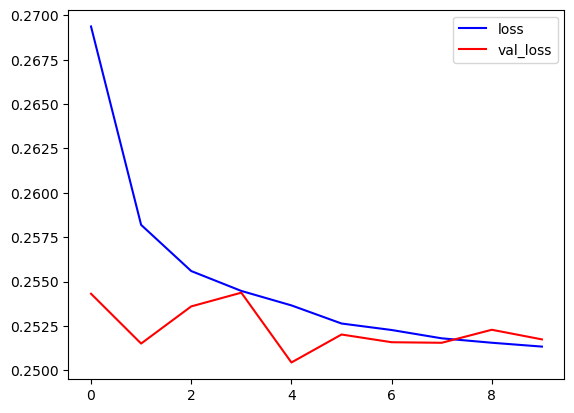

In [98]:
import matplotlib.pyplot as plt
# graphing the loss and val_loss
plt.plot(history.history['loss'], c= 'blue')
plt.plot(history.history['val_loss'], c ='red')
plt.legend(['loss', 'val_loss'])

# do the everything the same for test

In [99]:
df_application_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [100]:
corr_matrix = df_application_test.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df_application_test.drop(columns=to_drop, inplace=True)

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_37716/2721872300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_application_test.corr().abs()


In [101]:
# same features as df_application_train
selected_features = ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_CREDIT',
                     'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                     'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_TYPE',
                     'ORGANIZATION_TYPE', 'EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3']

medi_columns = [col for col in df_application_train.columns if '_MEDI' in col]

final_features = list(set(selected_features + medi_columns))

df_application_test = df_application_test[final_features]

In [102]:
df_application_test.isnull().sum()

NAME_FAMILY_STATUS         0
AMT_INCOME_TOTAL           0
ORGANIZATION_TYPE          0
SK_ID_CURR                 0
AMT_CREDIT                 0
AMT_ANNUITY               24
OCCUPATION_TYPE        15605
EXT_SOURCE_1           20532
EXT_SOURCE_2               8
EXT_SOURCE_3            8668
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
NAME_CONTRACT_TYPE         0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
DAYS_EMPLOYED              0
dtype: int64

In [103]:
df_application_test.duplicated().sum()

0

In [104]:
from preprocessed_DataClass import handle_missing_values
df_application_test = handle_missing_values(df_application_test)
df_application_test.isnull().sum().sum()

/Users/yanellyhernandez/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Learning Fuze/mod2/week 9/Data_class_proj/preprocessed_DataClass.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])
/Users/yanellyhernandez/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Learning Fuze/mod2/week 9/Data_class_proj/preprocessed_DataClass.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])
/Users/yanellyhe

0

In [105]:
# reducing the size of df_application_test
from preprocessed_DataClass import red_mem_usage
df_application_test, _ = red_mem_usage(df_application_test)

Memory usage of this df is:  5.950321197509766 MB
--------------------------------
column:  AMT_INCOME_TOTAL
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  SK_ID_CURR
data type before:  int64
data type after:  uint32
--------------------------------
--------------------------------
column:  AMT_CREDIT
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  AMT_ANNUITY
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  EXT_SOURCE_1
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  EXT_SOURCE_2
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  EXT_SOURCE_3
data type before:  float64
data type after:  float32


/Users/yanellyhernandez/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Learning Fuze/mod2/week 9/Data_class_proj/preprocessed_DataClass.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float32)
/Users/yanellyhernandez/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Learning Fuze/mod2/week 9/Data_class_proj/preprocessed_DataClass.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.uint32)
/Users/yanellyhernandez/Library/Mobile Document

In [106]:
df_application_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME_FAMILY_STATUS   48744 non-null  object 
 1   AMT_INCOME_TOTAL     48744 non-null  float32
 2   ORGANIZATION_TYPE    48744 non-null  object 
 3   SK_ID_CURR           48744 non-null  uint32 
 4   AMT_CREDIT           48744 non-null  float32
 5   AMT_ANNUITY          48744 non-null  float32
 6   OCCUPATION_TYPE      48744 non-null  object 
 7   EXT_SOURCE_1         48744 non-null  float32
 8   EXT_SOURCE_2         48744 non-null  float32
 9   EXT_SOURCE_3         48744 non-null  float32
 10  NAME_HOUSING_TYPE    48744 non-null  object 
 11  DAYS_BIRTH           48744 non-null  int16  
 12  NAME_CONTRACT_TYPE   48744 non-null  object 
 13  NAME_INCOME_TYPE     48744 non-null  object 
 14  NAME_EDUCATION_TYPE  48744 non-null  object 
 15  DAYS_EMPLOYED        48744 non-null 

# merging test like train

In [107]:
# # Convert the 'SK_ID_CURR' column in df_application_train to int64 if it's not already.
# df_application_test['SK_ID_CURR'] = df_application_test['SK_ID_CURR'].astype('int')


In [108]:
# Merge all aggregated tables with df_application_train on SK_ID_CURR
merged_test = df_application_test.merge(POS_CASH_agg, on='SK_ID_CURR', how='left') \
                                .merge(bureau_agg, on='SK_ID_CURR', how='left') \
                                .merge(credit_card_agg, on='SK_ID_CURR', how='left') \
                                .merge(previous_application_agg, on='SK_ID_CURR', how='left')

merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NAME_FAMILY_STATUS             48744 non-null  object 
 1   AMT_INCOME_TOTAL               48744 non-null  float32
 2   ORGANIZATION_TYPE              48744 non-null  object 
 3   SK_ID_CURR                     48744 non-null  uint32 
 4   AMT_CREDIT                     48744 non-null  float32
 5   AMT_ANNUITY                    48744 non-null  float32
 6   OCCUPATION_TYPE                48744 non-null  object 
 7   EXT_SOURCE_1                   48744 non-null  float32
 8   EXT_SOURCE_2                   48744 non-null  float32
 9   EXT_SOURCE_3                   48744 non-null  float32
 10  NAME_HOUSING_TYPE              48744 non-null  object 
 11  DAYS_BIRTH                     48744 non-null  int16  
 12  NAME_CONTRACT_TYPE             48744 non-null 

In [109]:
corr_matrix = merged_test.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
merged_test.drop(columns=to_drop, inplace=True)

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_37716/411338266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_test.corr().abs()


In [110]:
# feature engineer:
merged_test['CREDIT_INCOME_RATIO'] = merged_test['AMT_CREDIT'] / (merged_test['AMT_INCOME_TOTAL'] + 1e-5)
merged_test['ANNUITY_CREDIT_RATIO'] = merged_test['AMT_ANNUITY'] / (merged_test['AMT_CREDIT'] + 1e-5)
merged_test['ANNUITY_INCOME_RATIO'] = merged_test['AMT_ANNUITY'] / (merged_test['AMT_INCOME_TOTAL'] + 1e-5)
merged_test['EXT_SOURCE_COMBINATION'] = merged_test['EXT_SOURCE_2'] * merged_test['EXT_SOURCE_3']

In [111]:
# Polynomial or Interaction Features
merged_test['EXT_SOURCE_INTERACTION'] = merged_test['EXT_SOURCE_2'] * merged_test['EXT_SOURCE_3']
merged_test['AGE_EMPLOYMENT_RATIO'] = merged_test['DAYS_EMPLOYED'] / merged_test['DAYS_BIRTH']

# Custom Features
merged_test['DEBT_TO_INCOME_RATIO'] = merged_test['AMT_CREDIT'] / merged_test['AMT_INCOME_TOTAL']
merged_test['LOAN_TO_INCOME_RATIO'] = merged_test['AMT_CREDIT'] / (merged_test['AMT_ANNUITY'] + merged_test['AMT_INCOME_TOTAL'])

In [112]:
merged_test.duplicated().sum()

0

In [113]:
merged_test.isnull().sum().sum()

291978

In [114]:
from preprocessed_DataClass import handle_missing_values
merged_test = handle_missing_values(merged_test)
merged_test.isnull().sum().sum()

0

In [115]:
merged_test.select_dtypes(include=['object']).columns.tolist()

['NAME_FAMILY_STATUS',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE']

In [116]:
# Label encoding ft's as in merged_df
from preprocessed_DataClass import label_encode_test
merged_test = label_encode_test(merged_test, labelcols, label_encoders)

In [117]:
# Target encoding ft's as in merged_df
from preprocessed_DataClass import target_encode_test
merged_test = target_encode_test(merged_test, targ_encoders, target_cols)

In [118]:
merged_test.select_dtypes(include=['object']).columns.tolist()

[]

In [119]:
# reducing the size of merged_test
from preprocessed_DataClass import red_mem_usage
merged_test, _ = red_mem_usage(merged_test)

Memory usage of this df is:  12.551193237304688 MB
--------------------------------
column:  NAME_FAMILY_STATUS
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  AMT_INCOME_TOTAL
data type before:  float32
data type after:  float32
--------------------------------
--------------------------------
column:  ORGANIZATION_TYPE
data type before:  float64
data type after:  float32
--------------------------------
--------------------------------
column:  SK_ID_CURR
data type before:  uint32
data type after:  uint32
--------------------------------
--------------------------------
column:  AMT_CREDIT
data type before:  float32
data type after:  float32
--------------------------------
--------------------------------
column:  AMT_ANNUITY
data type before:  float32
data type after:  float32
--------------------------------
--------------------------------
column:  OCCUPATION_TYPE
data type before:  float64
data type 

In [120]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NAME_FAMILY_STATUS            48744 non-null  float32
 1   AMT_INCOME_TOTAL              48744 non-null  float32
 2   ORGANIZATION_TYPE             48744 non-null  float32
 3   SK_ID_CURR                    48744 non-null  uint32 
 4   AMT_CREDIT                    48744 non-null  float32
 5   AMT_ANNUITY                   48744 non-null  float32
 6   OCCUPATION_TYPE               48744 non-null  float32
 7   EXT_SOURCE_1                  48744 non-null  float32
 8   EXT_SOURCE_2                  48744 non-null  float32
 9   EXT_SOURCE_3                  48744 non-null  float32
 10  NAME_HOUSING_TYPE             48744 non-null  float32
 11  DAYS_BIRTH                    48744 non-null  int16  
 12  NAME_CONTRACT_TYPE            48744 non-null  uint8  
 13  N

# make prediction

In [121]:
# Ensure the test set has the same columns in the same order as the training set
feature_columns = xtrain.columns if isinstance(xtrain, pd.DataFrame) else X.columns

# Reorder `merged_test` to match the training feature order
merged_test = merged_test[feature_columns]


In [122]:
# Use the same scaler used for training data
merged_test = scaler.transform(merged_test)


In [123]:
# predict model
test_predictions = model.predict(merged_test)
test_predictions

1524/1524 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step


array([[0.06788055],
       [0.17813449],
       [0.04900856],
       ...,
       [0.06269655],
       [0.02641603],
       [0.10430025]], dtype=float32)

In [124]:
# setting up for submission
submission_df = pd.DataFrame({'SK_ID_CURR': df_application_test['SK_ID_CURR'],
                               'Target': test_predictions.flatten()})

In [125]:
submission_df 

,SK_ID_CURR,Target
0,100001,0.067881
1,100005,0.178134
2,100013,0.049009
3,100028,0.073095
4,100038,0.115073
...,...,...
48739,456221,0.032371
48740,456222,0.060432
48741,456223,0.062697
48742,456224,0.026416


In [126]:
# save to csv
submission_df.to_csv('submission_class_NN.csv', index = False)

We going w the code that is not commented in Neural Networks